In [2]:
import matplotlib.pyplot as plt #adding the libraries and dependecies
import pandas as pd
import numpy as np
import scipy.stats as st
data = 'data/data.csv'

In [3]:
data = pd.read_csv(data) #read in csv
data.head()

,DATE,TIME,LOCATION,OPERATOR,FLIGHT#,ROUTE,AIRCRAFT_TYPE,AIRCRAFT_REG,CN_LN,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army Air Forces,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",Unknown,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [4]:
data.drop(['TIME', 'FLIGHT#', 'AIRCRAFT_REG', 'CN_LN', 'SUMMARY_OF_EVENTS'], axis='columns', inplace=True) #drp columns from dataframe
data.head()

,DATE,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army Air Forces,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,09/07/1909,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0


In [5]:
data.fillna(0, inplace=True) #fill in blanks in DF with "0"
data.head()

,DATE,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army Air Forces,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,09/07/1909,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,08/06/1913,"Victoria, British Columbia, Canada",Private,0,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,09/09/1913,Over the North Sea,Military - German Navy,0,Zeppelin L-1 (airship),20.0,0.0,0.0,14.0,0.0,0.0,0.0


In [6]:
data['DATE']=pd.to_datetime(data.DATE) #changing this column to its own dataframe


In [7]:
t_year=data['DATE'].dt.year
t_year

0       1908
1       1909
2       1912
3       1913
4       1913
        ... 
4970    2019
4971    2019
4972    2020
4973    2020
4974    2020
Name: DATE, Length: 4975, dtype: int64

In [8]:
k_start_date1=pd.to_datetime('1965') #1 pulling this decade
k_end_date1=pd.to_datetime('1975')

k_timeframe1=data[data.DATE.between(k_start_date1, k_end_date1)]
k_year=k_timeframe1['DATE'].dt.year
k_timeframe1[['Type', 'Origin']]=k_timeframe1['OPERATOR'].str.split('-', n=1, expand=True) #combine columns
k_timeframe1.to_csv('k_timeframe1.csv', index = False) #export to csv
#k_timeframe1

C:\Users\kiele\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
t_start_date2=pd.to_datetime('1915') #2
t_end_date2=pd.to_datetime('1925')

t_timeframe2=data[data.DATE.between(t_start_date2, t_end_date2)]
t_year=t_timeframe2['DATE'].dt.year
t_timeframe2[['Type', 'Origin']]=t_timeframe2['OPERATOR'].str.split('-', n=1, expand=True)
t_timeframe2.to_csv('t_timeframe2.csv', index = False)

In [10]:
k_start_date5=pd.to_datetime('2005') #5
k_end_date5=pd.to_datetime('2015')

k_timeframe5=data[data.DATE.between(k_start_date5, k_end_date5)]
k_year=k_timeframe5['DATE'].dt.year
k_timeframe5[['Type', 'Origin']]=k_timeframe5['OPERATOR'].str.split('-', n=1, expand=True)
k_timeframe5.to_csv('k_timeframe5.csv', index = False)
#k_timeframe5

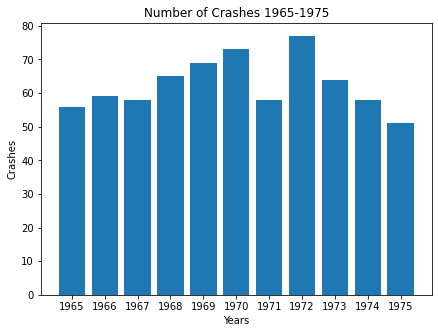

In [11]:
#bar graph comparing #of crashes vs yrs spotlight lowest years and critical point years
fig = plt.figure(figsize = (7, 5))
plt.ylabel("Crashes")
plt.xlabel('Years')
k_year1 = np.array (['1965','1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'])
k_crashes1 = np.array([56, 59, 58, 65, 69, 73, 58, 77, 64, 58, 51])
positions = np.array([0, 2, 4, 6, 8, 10, 12, 14])
plt.bar(k_year1, k_crashes1)
plt.title('Number of Crashes 1965-1975')
plt.savefig("AirHist1.png")
#plt.show()

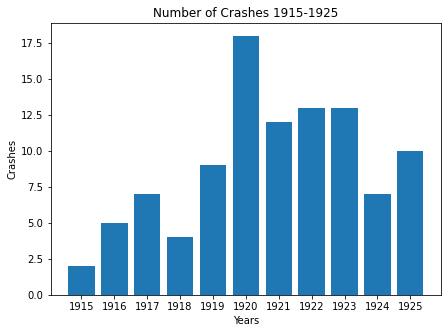

In [12]:
#bar graph comparing #of crashes vs yrs spotlight lowest years and critical point years
fig = plt.figure(figsize = (7, 5))
plt.ylabel("Crashes")
plt.xlabel('Years')
t_year2 = np.array (['1915','1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925'])
t_crashes2 = np.array([2, 5, 7, 4, 9, 18, 12, 13, 13, 7, 10])
positions = np.array([0, 2, 4, 6, 8, 10, 12, 14])
plt.bar(t_year2, t_crashes2)
plt.title('Number of Crashes 1915-1925')
plt.savefig("AirHist2.png")
#plt.show()

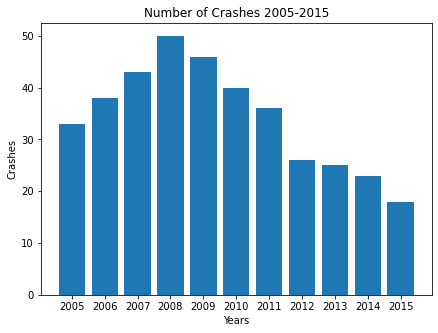

In [13]:
#bar graph comparing #of crashes vs yrs spotlight lowest years and critical point years
fig = plt.figure(figsize = (7, 5))
plt.ylabel("Crashes")
plt.xlabel('Years')
k_year5 = np.array (['2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
k_crashes5 = np.array([33, 38, 43, 50, 46, 40, 36, 26, 25, 23, 18])
positions = np.array([0, 2, 4, 6, 8, 10, 12,14])
plt.bar(k_year5, k_crashes5)
plt.title('Number of Crashes 2005-2015')
plt.savefig("AirHist5.png")

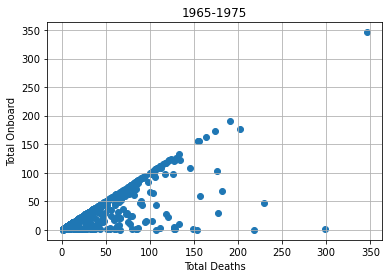

In [14]:
plt.scatter(k_timeframe1["TOTAL_ONBOARD"], k_timeframe1["TOTAL_FATALITIES"], marker="o") #scatterplot comparing # onboard vs total deaths in time frame #1
plt.title("1965-1975")
plt.ylabel("Total Onboard")
plt.xlabel("Total Deaths")
plt.grid(True)
plt.savefig("AirScat1.png")
plt.show()

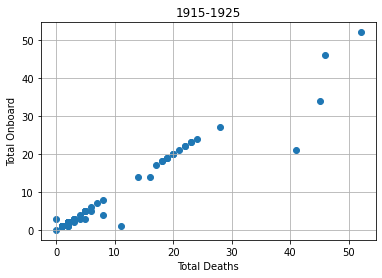

In [15]:
plt.scatter(t_timeframe2["TOTAL_ONBOARD"], t_timeframe2["TOTAL_FATALITIES"], marker="o") #scatterplot comparing # onboard vs total deaths in time frame #2
plt.title("1915-1925")
plt.ylabel("Total Onboard")
plt.xlabel("Total Deaths")
plt.grid(True)
plt.savefig("AirScat2.png")
plt.show()

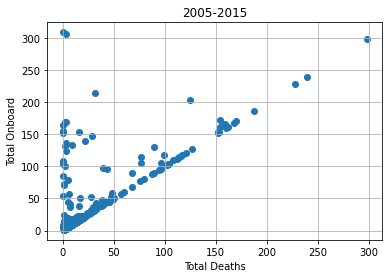

In [20]:
plt.scatter(k_timeframe5["TOTAL_FATALITIES"], k_timeframe5["TOTAL_ONBOARD"], marker="o") #scatterplot comparing # onboard vs total deaths in time frame #5
plt.title("2005-2015")
plt.ylabel("Total Onboard")
plt.xlabel("Total Deaths")
plt.grid(True)
plt.savefig("AirScat5.png")
plt.show()

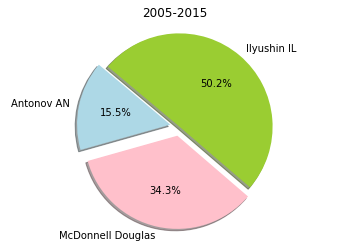

In [17]:
pies = ["Antonov AN", "McDonnell Douglas", "Ilyushin IL"] #comparison of top"10" aircraft types with highest fatalities in timeperiod #5
pie_votes = [476,1055,1543]
colors = ["lightblue","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0.1,0)
plt.title("2005-2015")
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("AirPies5.png")
plt.show()

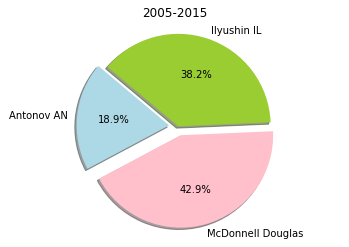

In [18]:
pies = ["Antonov AN", "McDonnell Douglas", "Ilyushin IL"] #comparison of top"10" aircraft types with highest fatalities in timeperiod #5
pie_votes = [18.9,42.9,38.2]
colors = ["lightblue","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0.1,0)
plt.title("2005-2015")
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("AirPies2.png")
plt.show()

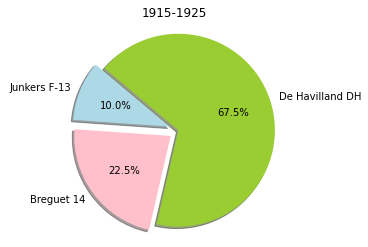

In [19]:
pies = ["Junkers F-13", "Breguet 14", "De Havilland DH"] #comparison of top"10" aircraft types with highest fatalities in timeperiod #2
pie_votes = [4,9,27]
colors = ["lightblue","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0.1,0)
plt.title("1915-1925")
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("AirPies2.png")
plt.show()